In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

In [3]:
# open Link

url="https://www.hubertiming.com/results/2018MLK"
html=urlopen(url)

In [4]:
soup = BeautifulSoup(html,'lxml')

In [5]:
title = soup.title
print(title)
print(title.text)

<title>2018 MLK Dream Run 5K Race Results</title>
2018 MLK Dream Run 5K Race Results


In [6]:
# Find links
links = soup.find_all('a')
print (links)

[<a href="mailto:timing@hubertiming.com">timing@hubertiming.com</a>, <a href="https://www.hubertiming.com/">Huber Timing Home</a>, <a class="btn btn-primary btn-lg" href="/results/2018MLK10K" role="button" style="margin: 0px 0px 5px 5px">10K</a>, <a class="btn btn-primary btn-lg" href="/results/2018MLK15K" role="button" style="margin: 0px 0px 5px 5px">15K</a>, <a class="btn btn-primary btn-lg" href="/results/summary/2018MLK" role="button" style="margin: 0px 0px 5px 5px">Summary</a>, <a href="#tabs-1" style="font-size: 18px">5K Results</a>, <a name="individual"></a>, <a href="https://www.hubertiming.com/"><img height="65" src="/sites/all/themes/hubertiming/images/clockWithFinishSign_small.png" width="50"/>Huber Timing</a>, <a href="https://facebook.com/hubertiming/"><img src="/results/FB-f-Logo__blue_50.png"/></a>]


In [8]:
links = soup.find_all('a', href=True)
for link in links:
    print(link['href'])
    print(link['href'])
        
    # can use  "print(link.get('href')) to get the same result

mailto:timing@hubertiming.com
mailto:timing@hubertiming.com
https://www.hubertiming.com/
https://www.hubertiming.com/
/results/2018MLK10K
/results/2018MLK10K
/results/2018MLK15K
/results/2018MLK15K
/results/summary/2018MLK
/results/summary/2018MLK
#tabs-1
#tabs-1
https://www.hubertiming.com/
https://www.hubertiming.com/
https://facebook.com/hubertiming/
https://facebook.com/hubertiming/


In [9]:
allrows = soup.find_all("tr")
print(allrows)
# all rows are consider as rows

[<tr><td>Finishers:</td><td>191</td></tr>, <tr><td>Male:</td><td>78</td></tr>, <tr><td>Female:</td><td>113</td></tr>, <tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>Age</th>
<th>City</th>
<th>State</th>
<th>Chip Time</th>
<th>Chip Pace</th>
<th>Gender Place</th>
<th>Age Group</th>
<th>Age Group Place</th>
<th>Time to Start</th>
<th>Gun Time</th>
</tr>, <tr>
<td>1</td>
<td>1191</td>
<td>MAX RANDOLPH</td>
<td>M</td>
<td>29</td>
<td>WASHINGTON</td>
<td>DC</td>
<td>16:48</td>
<td>5:25</td>
<td>1 of 78</td>
<td>M 21-39</td>
<td>1 of 33</td>
<td>0:08</td>
<td>16:56</td>
</tr>, <tr>
<td>2</td>
<td>1080</td>
<td>NEED NAME KAISER RUNNER</td>
<td>M</td>
<td>25</td>
<td>PORTLAND</td>
<td>OR</td>
<td>17:31</td>
<td>5:39</td>
<td>2 of 78</td>
<td>M 21-39</td>
<td>2 of 33</td>
<td>0:09</td>
<td>17:40</td>
</tr>, <tr>
<td>3</td>
<td>1275</td>
<td>DAN FRANEK</td>
<td>M</td>
<td>52</td>
<td>PORTLAND</td>
<td>OR</td>
<td>18:15</td>
<td>5:53</td>
<td>3 of 78</td>
<td>M 

In [10]:
allrows = soup.find_all("tr")
print(allrows[:5])

[<tr><td>Finishers:</td><td>191</td></tr>, <tr><td>Male:</td><td>78</td></tr>, <tr><td>Female:</td><td>113</td></tr>, <tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>Age</th>
<th>City</th>
<th>State</th>
<th>Chip Time</th>
<th>Chip Pace</th>
<th>Gender Place</th>
<th>Age Group</th>
<th>Age Group Place</th>
<th>Time to Start</th>
<th>Gun Time</th>
</tr>, <tr>
<td>1</td>
<td>1191</td>
<td>MAX RANDOLPH</td>
<td>M</td>
<td>29</td>
<td>WASHINGTON</td>
<td>DC</td>
<td>16:48</td>
<td>5:25</td>
<td>1 of 78</td>
<td>M 21-39</td>
<td>1 of 33</td>
<td>0:08</td>
<td>16:56</td>
</tr>]


In [11]:
print(allrows[0])

<tr><td>Finishers:</td><td>191</td></tr>


In [12]:
print(allrows[1])

<tr><td>Male:</td><td>78</td></tr>


In [13]:
print(allrows[:10])

[<tr><td>Finishers:</td><td>191</td></tr>, <tr><td>Male:</td><td>78</td></tr>, <tr><td>Female:</td><td>113</td></tr>, <tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>Age</th>
<th>City</th>
<th>State</th>
<th>Chip Time</th>
<th>Chip Pace</th>
<th>Gender Place</th>
<th>Age Group</th>
<th>Age Group Place</th>
<th>Time to Start</th>
<th>Gun Time</th>
</tr>, <tr>
<td>1</td>
<td>1191</td>
<td>MAX RANDOLPH</td>
<td>M</td>
<td>29</td>
<td>WASHINGTON</td>
<td>DC</td>
<td>16:48</td>
<td>5:25</td>
<td>1 of 78</td>
<td>M 21-39</td>
<td>1 of 33</td>
<td>0:08</td>
<td>16:56</td>
</tr>, <tr>
<td>2</td>
<td>1080</td>
<td>NEED NAME KAISER RUNNER</td>
<td>M</td>
<td>25</td>
<td>PORTLAND</td>
<td>OR</td>
<td>17:31</td>
<td>5:39</td>
<td>2 of 78</td>
<td>M 21-39</td>
<td>2 of 33</td>
<td>0:09</td>
<td>17:40</td>
</tr>, <tr>
<td>3</td>
<td>1275</td>
<td>DAN FRANEK</td>
<td>M</td>
<td>52</td>
<td>PORTLAND</td>
<td>OR</td>
<td>18:15</td>
<td>5:53</td>
<td>3 of 78</td>
<td>M 

In [14]:
allrows = soup.find_all("tr")
for row in allrows:
    row_list = row.find_all("td")
print(row_list)


[<td>191</td>, <td>1216</td>, <td>ZULMA OCHOA</td>, <td>F</td>, <td>40</td>, <td>GRESHAM</td>, <td>OR</td>, <td>1:43:27</td>, <td>33:22</td>, <td>113 of 113</td>, <td>F 40-54</td>, <td>37 of 37</td>, <td>0:00</td>, <td>1:43:27</td>]


In [15]:
allrows = soup.find_all("tr")
for row in allrows:
    row_list = row.find_all("td")
print(row_list)

for cell in row_list:
    print(cell.text)

[<td>191</td>, <td>1216</td>, <td>ZULMA OCHOA</td>, <td>F</td>, <td>40</td>, <td>GRESHAM</td>, <td>OR</td>, <td>1:43:27</td>, <td>33:22</td>, <td>113 of 113</td>, <td>F 40-54</td>, <td>37 of 37</td>, <td>0:00</td>, <td>1:43:27</td>]
191
1216
ZULMA OCHOA
F
40
GRESHAM
OR
1:43:27
33:22
113 of 113
F 40-54
37 of 37
0:00
1:43:27


In [16]:
data=[]
allrows = soup.find_all('tr')
for row in allrows:
    row_list = row.find_all('td')
    dataRow=[]
    for cell in row_list:
        dataRow.append(cell.text)
    data.append(dataRow)
titles = data[0]
data = data[1:]
print(titles)
print(data[-2:])

['Finishers:', '191']
[['190', '2087', 'LEESHA POSEY', 'F', '43', 'PORTLAND', 'OR', '1:33:53', '30:17', '112 of 113', 'F 40-54', '36 of 37', '0:00', '1:33:53'], ['191', '1216', 'ZULMA OCHOA', 'F', '40', 'GRESHAM', 'OR', '1:43:27', '33:22', '113 of 113', 'F 40-54', '37 of 37', '0:00', '1:43:27']]


In [17]:
# now we need to organise the data in data frame so that we get structured data. 
# Also if there are unwanted rows in the DF then remove all the rows by doing select at the previous step
# I am removing titles and also the first 2 rows which i dont need
# do not print the whole table(DF)if it is toomuch of data. so  print t he head and tail.
df = pd.DataFrame(data)
print(df.head())

        0     1                        2     3     4           5     6   \
0    Male:    78                     None  None  None        None  None   
1  Female:   113                     None  None  None        None  None   
2     None  None                     None  None  None        None  None   
3        1  1191             MAX RANDOLPH     M    29  WASHINGTON    DC   
4        2  1080  NEED NAME KAISER RUNNER     M    25    PORTLAND    OR   

      7     8        9        10       11    12     13  
0   None  None     None     None     None  None   None  
1   None  None     None     None     None  None   None  
2   None  None     None     None     None  None   None  
3  16:48  5:25  1 of 78  M 21-39  1 of 33  0:08  16:56  
4  17:31  5:39  2 of 78  M 21-39  2 of 33  0:09  17:40  


In [18]:
# Cleaning the data in data now 4 rows are removed. we can also do it in DF
data=[]
allrows = soup.find_all('tr')
for row in allrows:
    row_list = row.find_all('td')
    dataRow=[]
    for cell in row_list:
        dataRow.append(cell.text)
    data.append(dataRow)
titles = data[0]
data = data[4:]
print(data[-2:])

[['190', '2087', 'LEESHA POSEY', 'F', '43', 'PORTLAND', 'OR', '1:33:53', '30:17', '112 of 113', 'F 40-54', '36 of 37', '0:00', '1:33:53'], ['191', '1216', 'ZULMA OCHOA', 'F', '40', 'GRESHAM', 'OR', '1:43:27', '33:22', '113 of 113', 'F 40-54', '37 of 37', '0:00', '1:43:27']]


In [19]:
df = pd.DataFrame(data)
print(df.head())
print(df.tail(2))

  0     1                        2  3   4           5   6      7     8   \
0  1  1191             MAX RANDOLPH  M  29  WASHINGTON  DC  16:48  5:25   
1  2  1080  NEED NAME KAISER RUNNER  M  25    PORTLAND  OR  17:31  5:39   
2  3  1275               DAN FRANEK  M  52    PORTLAND  OR  18:15  5:53   
3  4  1223              PAUL TAYLOR  M  54    PORTLAND  OR  18:31  5:58   
4  5  1245              THEO KINMAN  M  22                  19:31  6:17   

        9        10       11    12     13  
0  1 of 78  M 21-39  1 of 33  0:08  16:56  
1  2 of 78  M 21-39  2 of 33  0:09  17:40  
2  3 of 78  M 40-54  1 of 27  0:07  18:22  
3  4 of 78  M 40-54  2 of 27  0:07  18:38  
4  5 of 78  M 21-39  3 of 33  0:09  19:40  
      0     1             2  3   4         5   6        7      8           9   \
189  190  2087  LEESHA POSEY  F  43  PORTLAND  OR  1:33:53  30:17  112 of 113   
190  191  1216   ZULMA OCHOA  F  40   GRESHAM  OR  1:43:27  33:22  113 of 113   

          10        11    12       13  
1

In [20]:
# fetching column names
col_headers = soup.find_all('th')
col_headers

[<th>Place</th>,
 <th>Bib</th>,
 <th>Name</th>,
 <th>Gender</th>,
 <th>Age</th>,
 <th>City</th>,
 <th>State</th>,
 <th>Chip Time</th>,
 <th>Chip Pace</th>,
 <th>Gender Place</th>,
 <th>Age Group</th>,
 <th>Age Group Place</th>,
 <th>Time to Start</th>,
 <th>Gun Time</th>]

In [21]:
# Adding columnes to header or data frame 
header_list = []
col_headers = soup.find_all('th')
for col in col_headers:
    header_list.append(col.text)
print (header_list)

['Place', 'Bib', 'Name', 'Gender', 'Age', 'City', 'State', 'Chip Time', 'Chip Pace', 'Gender Place', 'Age Group', 'Age Group Place', 'Time to Start', 'Gun Time']


In [22]:
df.columns = header_list
print(df.head())

  Place   Bib                     Name Gender Age        City State Chip Time  \
0     1  1191             MAX RANDOLPH      M  29  WASHINGTON    DC     16:48   
1     2  1080  NEED NAME KAISER RUNNER      M  25    PORTLAND    OR     17:31   
2     3  1275               DAN FRANEK      M  52    PORTLAND    OR     18:15   
3     4  1223              PAUL TAYLOR      M  54    PORTLAND    OR     18:31   
4     5  1245              THEO KINMAN      M  22                       19:31   

  Chip Pace Gender Place Age Group Age Group Place Time to Start Gun Time  
0      5:25      1 of 78   M 21-39         1 of 33          0:08    16:56  
1      5:39      2 of 78   M 21-39         2 of 33          0:09    17:40  
2      5:53      3 of 78   M 40-54         1 of 27          0:07    18:22  
3      5:58      4 of 78   M 40-54         2 of 27          0:07    18:38  
4      6:17      5 of 78   M 21-39         3 of 33          0:09    19:40  


In [40]:
print(df.tail())

    Place   Bib              Name Gender Age      City State Chip Time  \
186   187  1254    CYNTHIA HARRIS      F  64  PORTLAND    OR   1:07:51   
187   188  1085    EBONY LAWRENCE      F  30  PORTLAND    OR   1:08:12   
188   189  1170  ANTHONY WILLIAMS      M  39  PORTLAND    OR   1:09:11   
189   190  2087      LEESHA POSEY      F  43  PORTLAND    OR   1:33:53   
190   191  1216       ZULMA OCHOA      F  40   GRESHAM    OR   1:43:27   

    Chip Pace Gender Place Age Group Age Group Place Time to Start Gun Time  
186     21:53   110 of 113     F 55+        14 of 14          1:19  1:09:10  
187     22:00   111 of 113   F 21-39        53 of 53          0:58  1:09:10  
188     22:19     78 of 78   M 21-39        33 of 33          0:08  1:09:19  
189     30:17   112 of 113   F 40-54        36 of 37          0:00  1:33:53  
190     33:22   113 of 113   F 40-54        37 of 37          0:00  1:43:27  


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 14 columns):
Place              191 non-null object
Bib                191 non-null object
Name               191 non-null object
Gender             191 non-null object
Age                191 non-null object
City               191 non-null object
State              191 non-null object
Chip Time          191 non-null object
Chip Pace          191 non-null object
Gender Place       191 non-null object
Age Group          191 non-null object
Age Group Place    191 non-null object
Time to Start      191 non-null object
Gun Time           191 non-null object
dtypes: object(14)
memory usage: 21.0+ KB


In [24]:
df.shape

(191, 14)

In [25]:
df2=df.dropna(how='any')
df2.shape

(191, 14)

In [48]:
#df2['ChipTime_minutes'] = pd.to_timedelta(df2['Chip Time'])
#df2['ChipTime_minutes'] = df2 ['ChipTime_minutes'].astype('timedelta64[s]')/60
# print(df2[['Gender''ChipTime_minutes']].tail())

In [50]:
print(df2[['Gender','Chip Time']].head())

  Gender Chip Time
0      M     16:48
1      M     17:31
2      M     18:15
3      M     18:31
4      M     19:31


Text(0.5, 1.0, 'Comparison of average minutes run by male and female ')

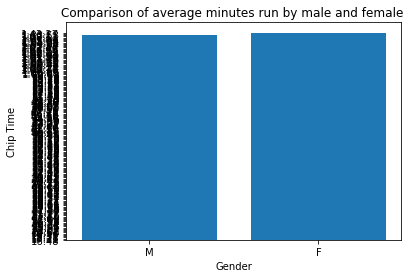

In [55]:
plt.bar(df2['Gender'],df2['Chip Time'])
plt.xlabel('Gender')
plt.ylabel('Chip Time')
plt.title("Comparison of average minutes run by male and female ")
        

In [ ]:
df2.describe(include=np)